In [84]:
import numpy as np
from scipy import linalg
from sympy import *
import matplotlib.pyplot as plt
import scipy.linalg
from matplotlib import gridspec
from matplotlib import axes

In [85]:
A = np.array([[10/3, -22/9, -20],
            [-5/3, 11/3, 10],
            [-4, 2, 7]])
def u_x0(x):
    return np.array([np.sin(np.pi*x), np.cos(np.pi*x), 1 + np.sin(np.pi*x)])
L = 1
T = 1

In [86]:
#Left eigenvectors
eig_vals, left_eig = np.linalg.eig(np.transpose(A))
print(eig_vals)
print(left_eig)

[16.12477034 -4.17992913  2.05515879]
[[-0.31665484  0.45351517 -0.38345102]
 [ 0.2106078  -0.08485304 -0.88960253]
 [ 0.92486435  0.88720006  0.24813839]]


In [87]:
#Riman's invariants
def R(eig_vectors, u):
    return np.matmul(eig_vectors, u)
vec_one = np.ones((3, 1))
print(R(left_eig, vec_one))

[[-0.24659068]
 [-0.76384776]
 [ 2.0602028 ]]


In [88]:
R10 = lambda x: 2/3*np.sin(np.pi*x) + 1/3*np.cos(np.pi*x) + 1
R20 = lambda x: 16/9*np.sin(np.pi*x) + 5/9*np.cos(np.pi*x) + 1
R3 =  lambda x: 1/2*np.sin(np.pi*x)+np.cos(np.pi*x)

def LMH(lmbd, R0, h, tau):
    M, N = int(L/h)+1, int(T/tau)+1
    R = np.zeros(M*N).reshape(N, M)
    R[0, :] = np.array([R0(x) for x in np.arange(0, L+h, h)]).copy()
    if lmbd > 0:
        R[:, 0] = np.array([R0(-lmbd*n*tau) for n in range(N)]).copy()
        for n in range(0, N-1):
            for m in range(1, M):
                R[n+1, m] = (1/tau + lmbd/h)*(1/tau*R[n, m] + lmbd/h*R[n+1, m-1])
    else:
        R[:, M-1] = np.array([R0(1-lmbd*n*tau) for n in range(N)]).copy()
        for n in range(0, N-1):
            for m in range(M-2, -1, -1):
                R[n+1, m] = R[n, m]-(lmbd*tau/h)*(R[n, m+1]-R[n, m])
    return R

h = [0.1, 0.01, 0.001]
tau = 0.1
#R = [LMH(17, R10, h[0], tau), LMH(-3, R20, h[0], tau), R3(np.linspace(0, 1, int(L/h[0])+1))]
#u = [-R[0] + R[1] - 2/9*R[2], 1/2*R[0] - 1/2*R[1] + 10/9*R[2], 1/2*R[0] + 1/2*R[1] - 4/9*R[2]]


In [89]:
def plot_nev(x, t, u, s, a, R0):
    x_, t_ = np.meshgrid(x, t)
    fig = plt.figure(figsize = (24, 6))
    gs2 = gridspec.GridSpec(3, 3)
    ax = fig.add_subplot(gs2[:, :1], projection='3d')
    ax.plot_wireframe(x_,t_, u)
    ax.set_xlabel("x")
    ax.set_ylabel("t")
    ax.set_zlabel(s)
    ax.set_title(s)
    ax.plot_surface(x_, t_, R_theory(x_, t_, a, R0), color = "yellow", alpha = 0.5)
    ax1 = fig.add_subplot(gs2[:2, -2])
    ax1.plot(t, [max(abs(u[n]-R_theory(x, n*tau, a, R0))) for n in range(len(t))])
    ax1.set_xlabel("t")
    ax1.set_ylabel("max$_x$|"+s+"-Rtheory|")
    ax1.set_title("Невязка по x")
    ax2= fig.add_subplot(gs2[:2, -1])
    ax2.plot(x, [max(abs(u[:, m]-R_theory(h*m, t, a, R0))) for m in range(len(x))])
    ax2.set_xlabel("x")
    ax2.set_ylabel("max$_t$|"+s+"-Rtheory|")
    ax2.set_title("Невязка по t")
    plt.show()

<ipython-input-88-8c2432650dba>:13: RuntimeWarning: overflow encountered in double_scalars
  R[n+1, m] = (1/tau + lmbd/h)*(1/tau*R[n, m] + lmbd/h*R[n+1, m-1])


<Figure size 1440x432 with 0 Axes>

/home/undermouse/anaconda3/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:46: RuntimeWarning: overflow encountered in double_scalars
  dz /= az
/home/undermouse/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:2234: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
/home/undermouse/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:809: RuntimeWarning: overflow encountered in double_scalars
  if abs_min // 10 ** oom != abs_max // 10 ** oom)
/home/undermouse/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:810: RuntimeWarning: overflow encountered in double_scalars
  if (abs_max - abs_min) / 10 ** oom <= 1e-2:
/home/undermouse/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:816: RuntimeWarning: overflow encountered in double_scalars
  if abs_max // 10 ** oom - abs_min // 10 ** oom > 1)


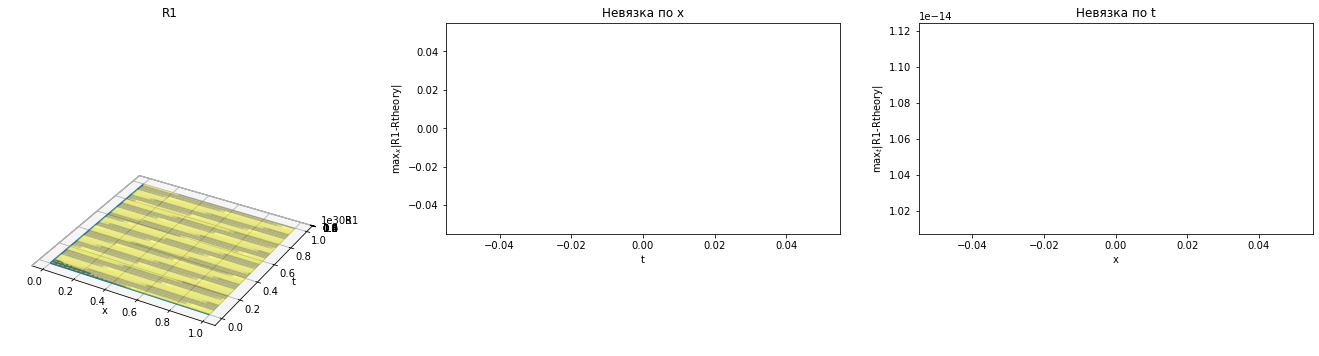

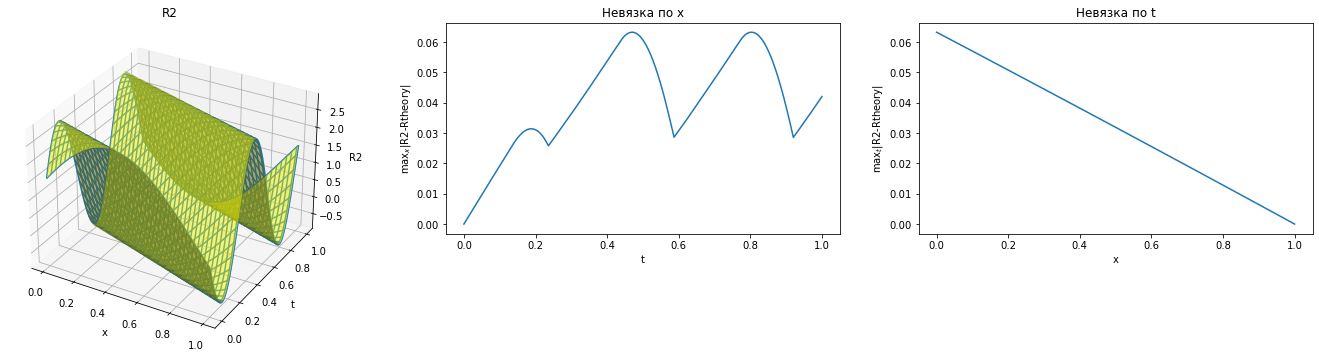

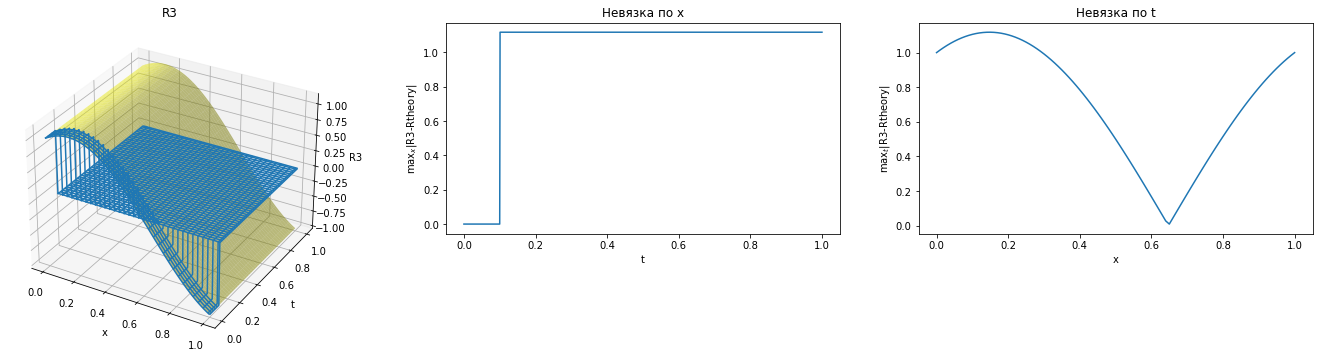

In [90]:
fig = plt.figure(figsize = (20, 6))
def R_theory(x, t, a, R0):
    return R0(x-a*t)

h, tau = 0.01, 0.001
x = np.arange(0, L+h, h)
t = np.arange(0, T+tau, tau)
M, N = int(L/h)+1, int(T/tau)+1
_R3 = np.zeros(M*N).reshape(N, M)
for i in range(len(np.linspace(0, 1, int(L/h)+1))):
    _R3[i, :] = R3(np.linspace(0, 1, int(L/h)+1))
R = [LMH(17, R10, h, tau), LMH(-3, R20, h, tau), _R3]
plot_nev(x, t, R[0], "R1", 17, R10)
plot_nev(x, t, R[1], "R2", -3, R20)
plot_nev(x, t, R[2], "R3", 0, R3)